In [1]:
import sys
sys.path.append('src');

# OpenCV

OpenCV is a popular framework for image and video processing. On this tutorial,
we show how OpenPifPaf can integrate with a workflow from OpenCV. OpenPifPaf
also comes with a video tool for processing videos from files or usb cameras
that is based on OpenCV, {ref}`openpifpaf.video <cli-help-video>`.

In [2]:
import cv2
import openpifpaf

%matplotlib inline
openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 200

## Source

The `cv2.VideoCapture` class supports an enourmous amount of sources 
(files, cameras, rtmp, etc, ...) and abstracts the details away. Here, we will
just pass in a single image.

In [3]:
capture = cv2.VideoCapture('dataset/test2.png')
_, image = capture.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

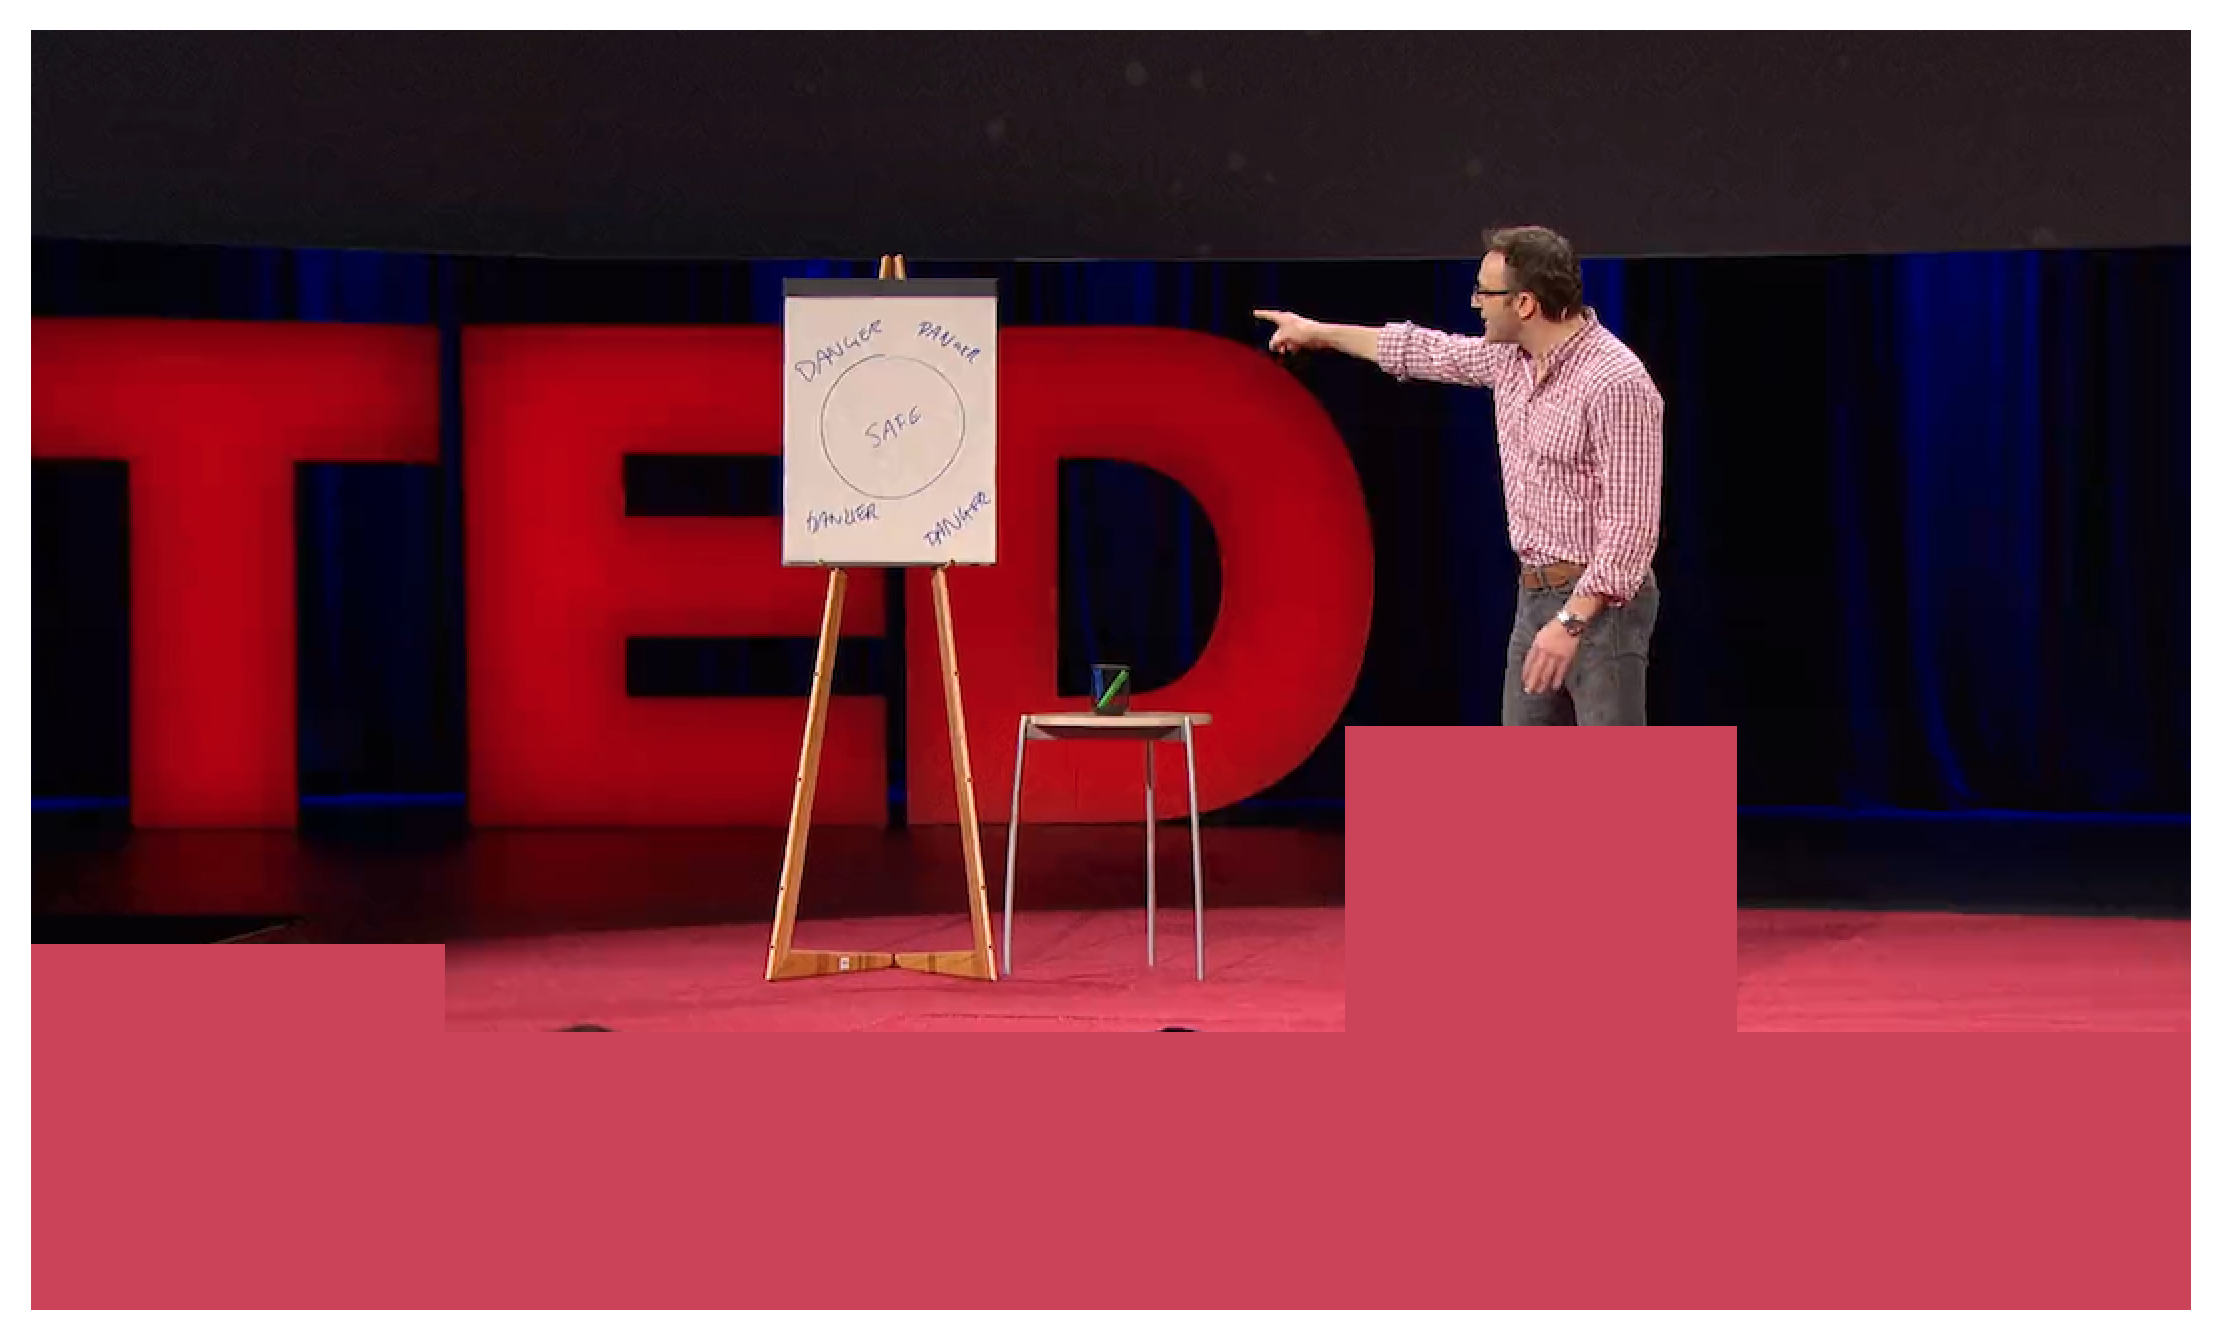

In [4]:
with openpifpaf.show.Canvas.image(image) as ax:
    pass

## Prediction

Now that we have the image, we can use the `openpifpaf.Predictor` and then
visualize its predicted annotations with an `AnnotationPainter`:

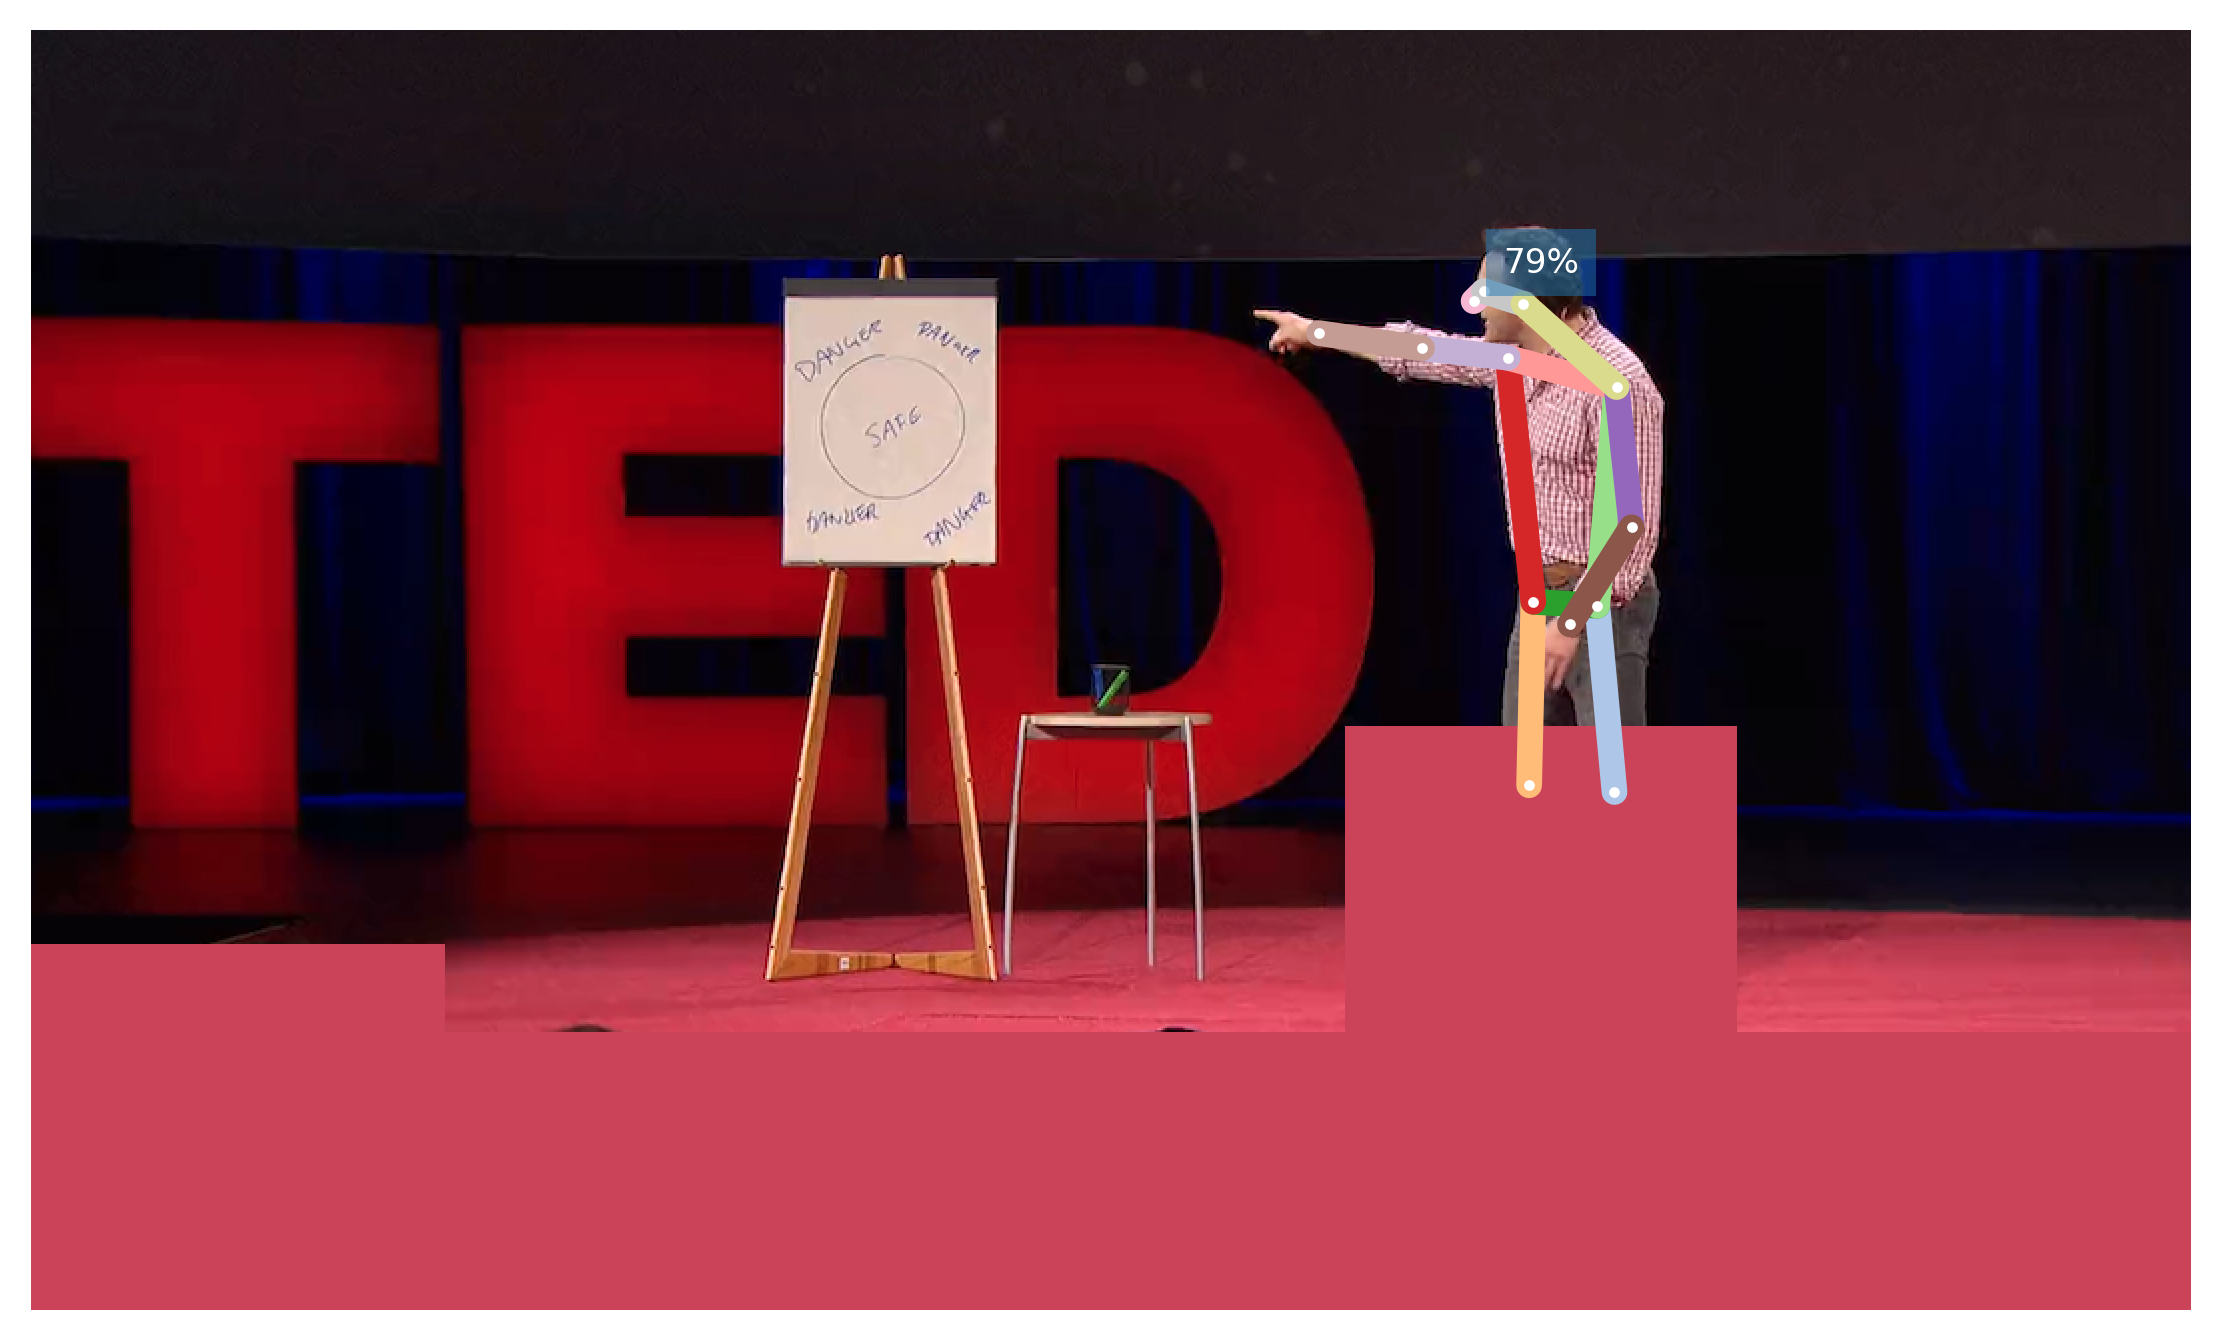

In [13]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, meta = predictor.numpy_image(image)

annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.Canvas.image(image) as ax:
    annotation_painter.annotations(ax, predictions)

This example is intentionally left to be quite basic. If you are interested
to accelerate this process with a GPU or you have many images that should be
pre-loaded in parallel, please have a look at the {doc}`Prediction API <predict_api>` 
or use the {ref}`openpifpaf.video <cli-help-video>` command line tool.

Loading model type: sequence2

The file /home/fernando/Proyectos/PROGRAMACION/GITHUB.COM/OPPFILLER/oppfiller/src/OppFiller/models/model_sequence2/model.h5  was loaded


Model sequence2 loaded.

[[7.2086377e+02 1.3502292e+02 9.8101902e-01]
 [7.2604578e+02 1.2999986e+02 9.9094659e-01]
 [7.2551996e+02 1.3140346e+02 1.0000000e+00]
 [7.4580927e+02 1.3630232e+02 9.9908477e-01]
 [7.2034509e+02 1.3529796e+02 1.0000000e+00]
 [7.9235956e+02 1.7796422e+02 9.9234015e-01]
 [7.3798688e+02 1.6326360e+02 9.7556525e-01]
 [7.9985754e+02 2.4807942e+02 9.7112781e-01]
 [6.9504926e+02 1.5855936e+02 9.6715117e-01]
 [7.6905164e+02 2.9665073e+02 9.6057421e-01]
 [6.4363068e+02 1.5099095e+02 9.6957529e-01]
 [7.8271484e+02 2.8725745e+02 9.5149857e-01]
 [7.5074603e+02 2.8532050e+02 9.6345371e-01]
 [7.9132141e+02 3.8042258e+02 8.1169027e-01]
 [7.4862677e+02 3.7706589e+02 7.4815869e-01]
 [8.0759546e+02 4.6862354e+02 1.0000000e+00]
 [7.6147052e+02 4.6407019e+02 1.0000000e+00]]
[[731.5885  137.33286   1.     ]
 [738.9

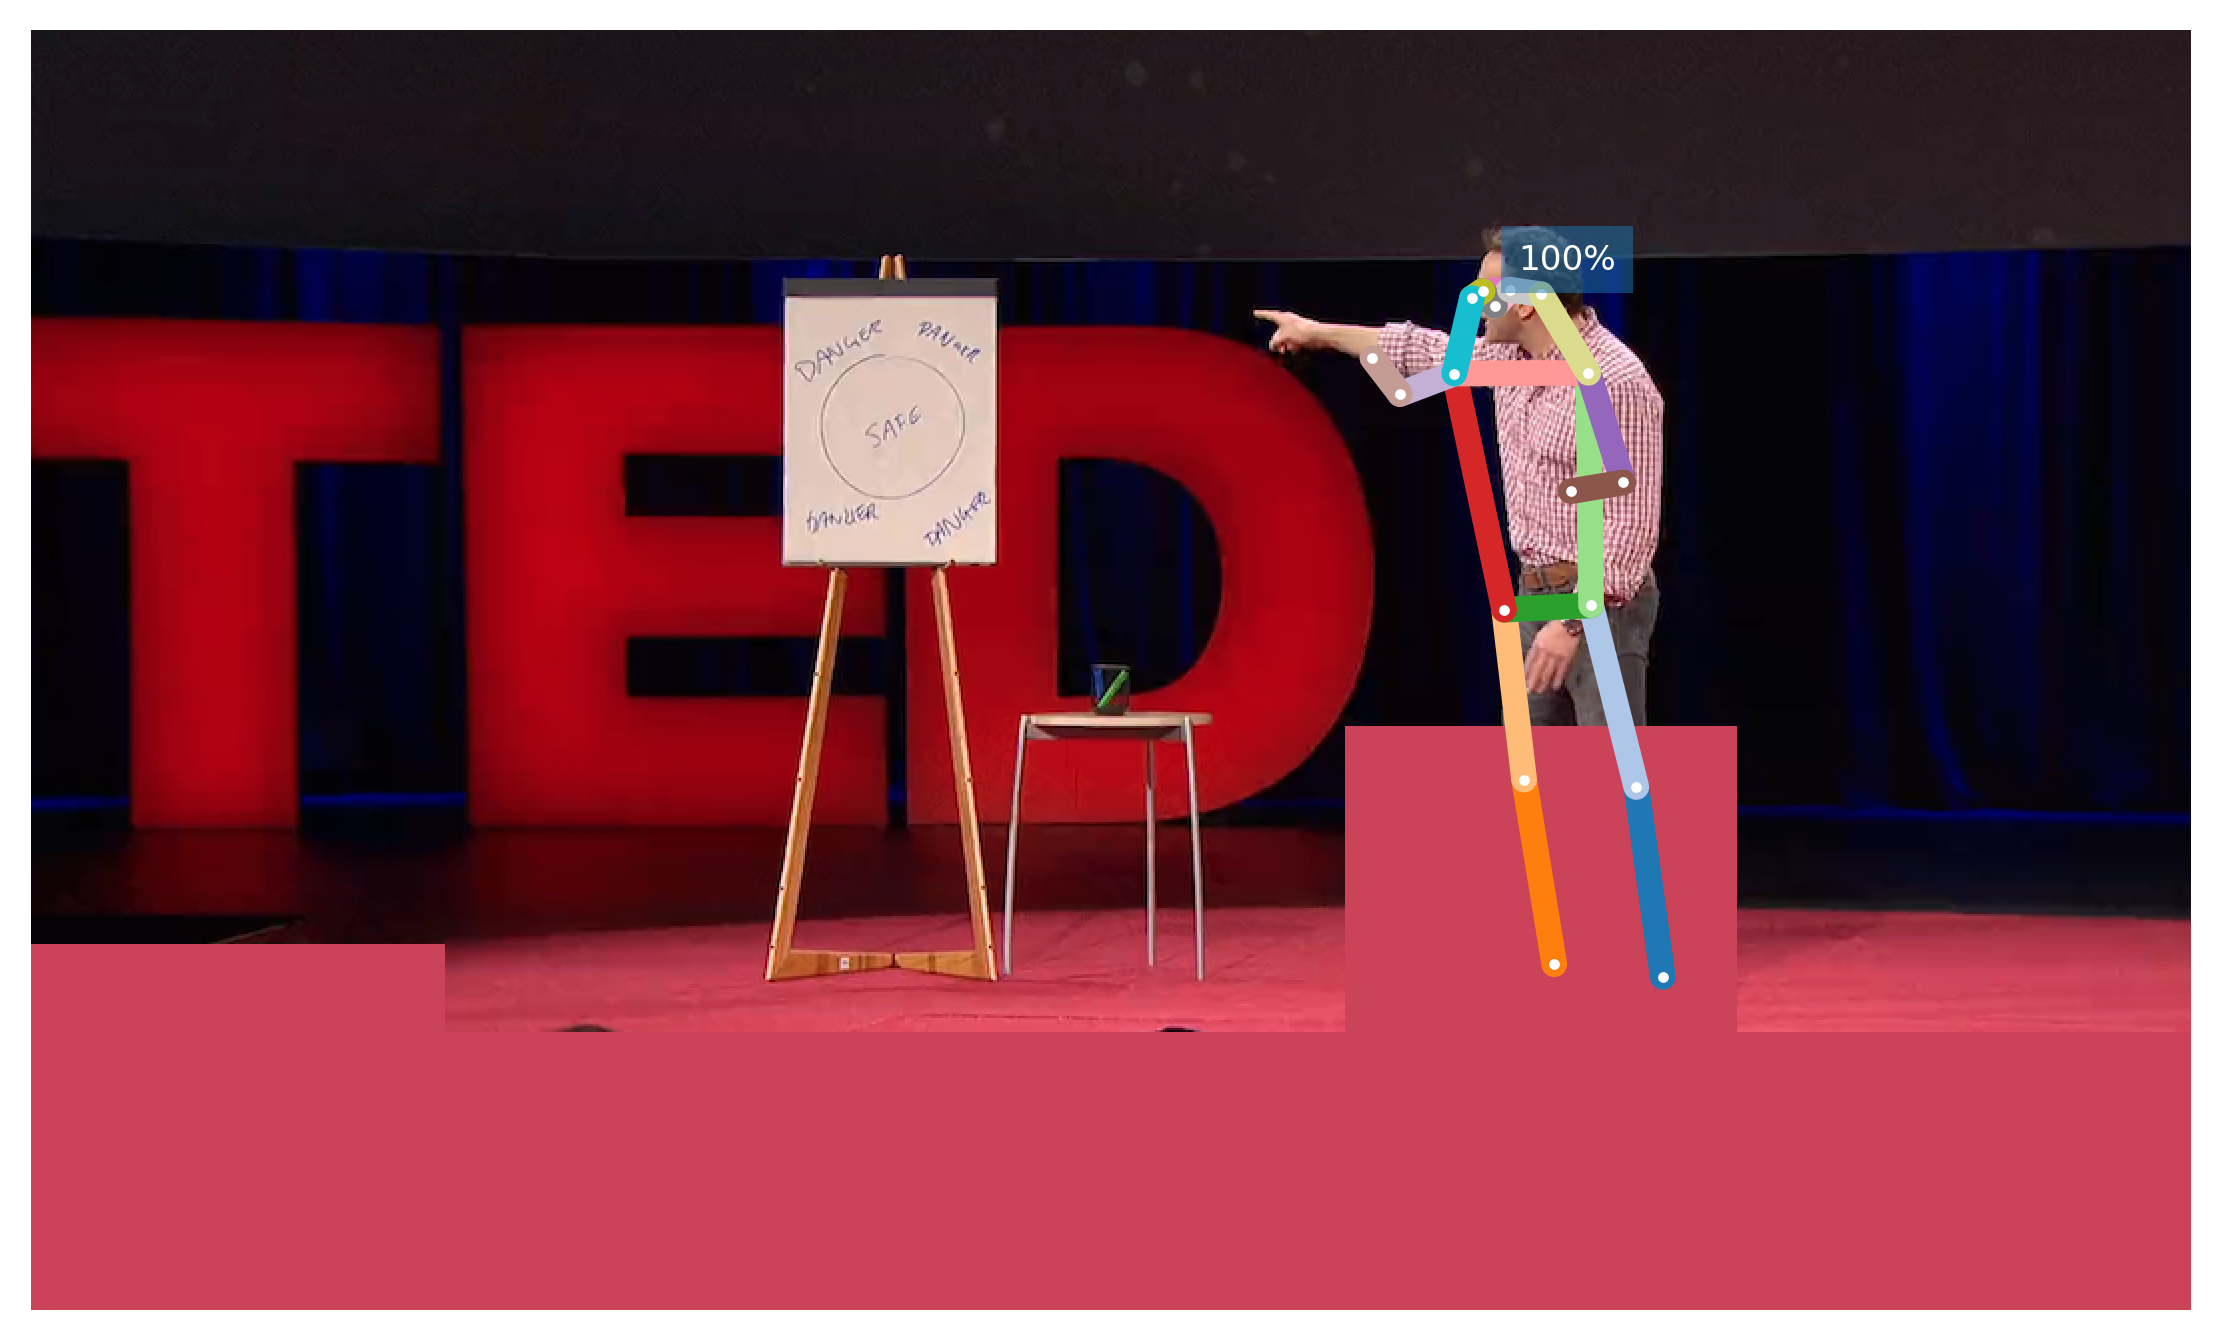

In [15]:
import OppFiller.Filler as oppmg
import OppFiller.Functions as oppf

obj=oppmg.Filler(model_type='sequence2');

for prediction in predictions:
    print(prediction.data)
    prediction.data=obj.FillPredictionData(prediction.data,All=True);
    print(prediction.data)

annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.Canvas.image(image) as ax:
    annotation_painter.annotations(ax, predictions)